## Assignment A3a: Signals and Noise

### 1. Continuous signals and sampling

Discrete sampling of continuous signals has some implications that are important to appreciate.  The first is that the sampled signal is only a *representation* of the underlying continuous signal and it doesn't necessarily capture all the information.  It is easy to visualize this by making a plot that overlays the discrete samples on the continuous function.

### 1a. Sampled functions

Write a function
```
plot_sampled_function(g=sin; fs=1, tlim=(0,2π), tscale=1, tunits="secs")
```
which plots a function `g` with overlaid samples at sampling frequency `fs` over range `tlim`, which is scaled by `tscale` and is plotted in units of `tunits`.  The function should be plotted as a line, and the samples should be overlaid as a stem plot.  

Looking ahead to the next module on sound localization, we want to start getting used to thinking in terms of the time scale of the waveform and use examples that more relevant to biological perception.  Instead of the defaults (which are sensible for a generic function), use `tscale=10^3` and `tunits="msecs"` for your examples.  Note that this time scale only applies to the plot -- time as a function argument should be in seconds.  This is to have a clean separation between the information and the display of the information.

Plot two examples using a sine and gammatone functions.  You can re-use your code from A1b.

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
import librosa
import librosa.display
from copy import deepcopy,copy
from scipy.io.wavfile import read
import scipy.io.wavfile
from IPython.display import display,Latex
from pylab import *
from scipy.io import wavfile
import wave
import random
import h5py
import math

#### Design plot_sampled_function

In [2]:
def plot_sampled_function(g='sin',fs=1,tlim=[0,2*np.pi],tscale=1,tunits="secs",f=1,phi=0,sigma=1,n=4):
    if g == 'sin':
        x=np.linspace(tlim[0],tlim[1],1000,endpoint=True)
        y=np.vectorize(sinewave)(x,f,phi)
        plt.title('%d Hz sine wave sampled at %d Hz'%(f,fs),size=10,color='black')
    if g == 'cos':
        x=np.linspace(tlim[0],tlim[1],1000,endpoint=True)
        y=np.vectorize(coswave)(x,f,phi)
        plt.title('%d Hz cosine wave sampled at %d Hz'%(f,fs),size=10,color='black') 
    if g == 'gammatone':
        x=np.linspace(tlim[0],tlim[1],400,endpoint=True)
        y=np.vectorize(gammatone)(x,fs,f)
        plt.title('%d Hz gammatone sampled at %d Hz' %(f,fs),size=10,color='black')
        
    a=len(x)
    index=np.linspace(0,a,timetoindex(tlim[1]-tlim[0],fs),endpoint=False)
    x_plot=[]
    y_plot=[]
    for i in index:
        x_plot.append(x[int(i)])
        y_plot.append(y[int(i)])  
    if tunits == 'secs':
        plt.xlabel('time(secs)')
    else:
        plt.xlabel('time(msecs)')
        x_plot=np.array(x_plot)
        x_plot*=tscale
        x*=tscale
    plt.grid()
    plt.plot(x,y,color='b')
    for i in range(0,len(y_plot)):
        plt.scatter(x_plot[i],y_plot[i],color='r',marker='o')
        plt.plot([x_plot[i],x_plot[i]],[0,y_plot[i]],color='r',linestyle='-')
        plt.ylabel('amplitude')
    plt.scatter(x[-1],y[-1],color='r',marker='o')
    plt.plot([x[-1],x[-1]],[0,y[-1]],color='r',linestyle='-')
    plt.show()
    
def sinewave(t,f,phi):
    return np.sin(2*np.pi*f*t+phi)   

def coswave(t, f, phi):
    return np.cos(2*np.pi*f*t + phi)

def timetoindex(t,fs):
    return int(t*fs)

def gammatone(t,fs,f):
    b=calculate_b(f)
    return calculate_gammatone(t,b,f)/calculate_a(fs,b,f)

def calculate_a(fs,b,f):
    sum_g=[]
    for index in range(0,fs):
        t=(index)/fs
        sum_g.append(calculate_gammatone(t,b,f))
    return np.linalg.norm(sum_g)

def calculate_b(f):
    return 1.019*24.7*(4.37*f/1000+1)

def calculate_gammatone(t,b,f,n=4,phi=0):
    return pow(t,n-1) * np.exp(-2*np.pi*b*t)*np.cos(2*np.pi*f*t+phi)

### Plot examples using a sine
A plot of a 1000 Hz sine wave sampled at 8000 Hz.

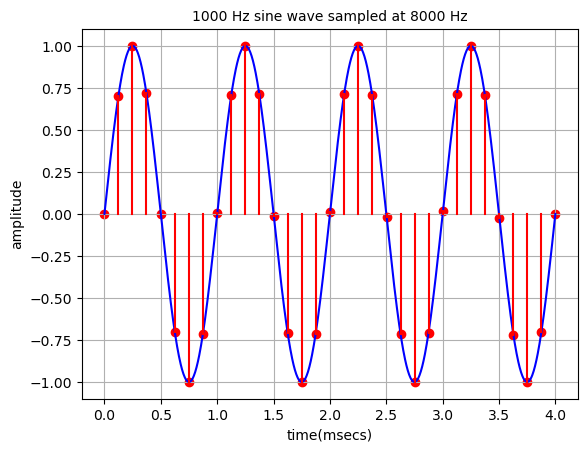

In [3]:
plot_sampled_function(g = 'sin', fs = 8000, tlim = [0, 0.004], tscale = 1000, 
                      tunits = "msecs", f = 1000, phi = 0, sigma = 1, n = 4)

#### Plot examples using gammatone functions

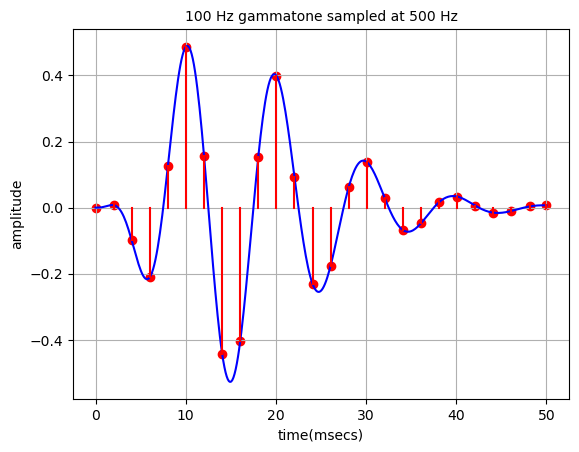

In [4]:
plot_sampled_function(g = 'gammatone', fs = 500, tlim = [0, 0.05], tscale = 1000, 
                      tunits = "msecs", f = 100, phi = 0, sigma = 1, n = 4)

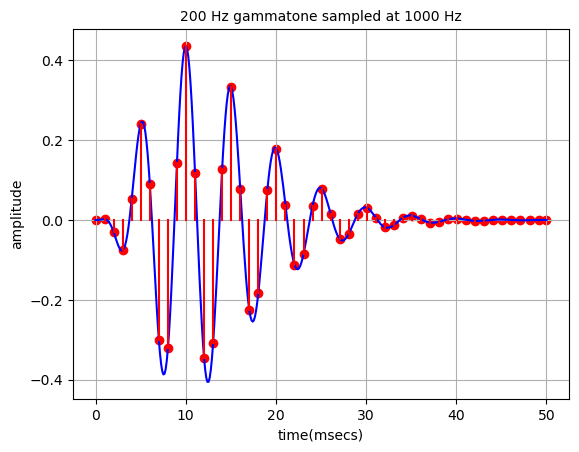

In [5]:
#### A plot of a 200 Hz gammatone sampled at 1000 Hz.
plot_sampled_function(g = 'gammatone', fs = 1000, tlim = [0, 0.05], tscale = 1000, 
                      tunits = "msecs", f = 200, phi = 0, sigma = 1, n = 4)

### 1b. The Nyquist frequency and aliasing

The **Nyquist frequency** is defined as $f_s/2$, i.e. one half the sampling frequency.  It is the upper bound on the signal frequency that can be represented with sampling frequency $f_s$.

**Aliasing** occurs when the frequency of the function is greater than the sampling frequency, i.e. $f > f_s$.  In this case, sampling of a periodic function like sine can result in the appearance of sampling a function of much lower frequency than what's actually there.  To avoid aliasing artifacts when you digitally sample signals, you need to filter out all frequencies higher than the Nyquist frequency.

Use your function above to illustrate different types of sampling phenomena for these conditions:
1. A sine wave below Nyquist at a frequency that shows a few samples per period which unevenly distributed.
2. sine at Nyquist
3. cosine at Nyquist
4. cosine sampled above Nyquist frequency that clearly shows aliasing

### Sine
Plot of a 315 Hz sine wave sampled at 1000 Hz.

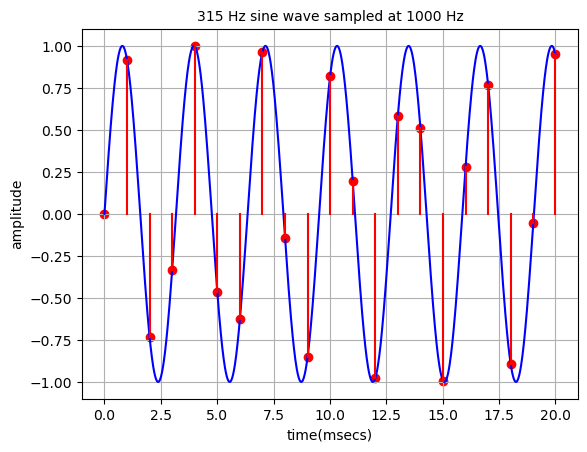

In [6]:
plot_sampled_function(g = 'sin', fs = 1000, tlim = [0, 0.02], tscale = 1000, 
                      tunits = "msecs", f = 315, phi = 0, sigma = 1, n = 4)

Plot a 500 Hz sine wave sampled at 1000 Hz.

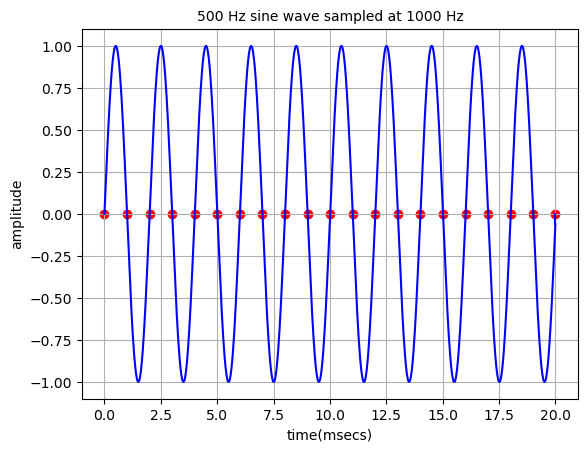

In [7]:
import A333333a
A333333a.plot_sampled_function111(g = 'sin', fs = 1000, tlim = [0, 0.02], tscale = 1000, 
                      tunits = "msecs", f = 500, phi = 0, sigma = 1, n = 4)

### Cosine

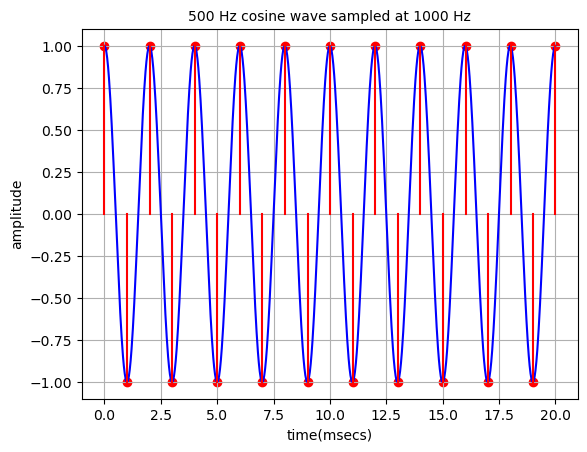

In [8]:
plot_sampled_function(g = 'cos', fs = 1000, tlim = [0, 0.02], tscale = 1000, 
                      tunits = "msecs", f = 500, phi = 0, sigma = 1, n = 4)

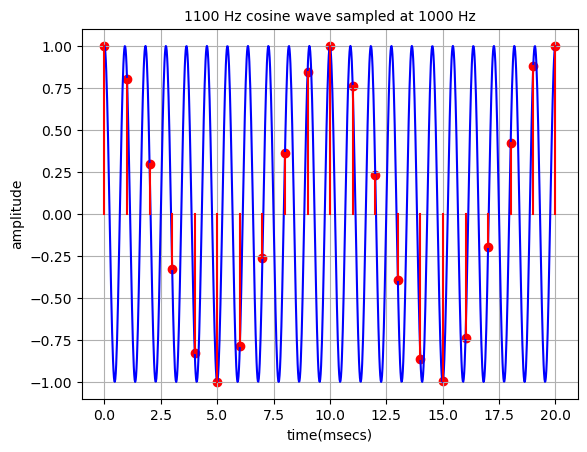

In [9]:
plot_sampled_function(g = 'cos', fs = 1000, tlim = [0, 0.02], tscale = 1000, 
                      tunits = "msecs", f = 1100, phi = 0, sigma = 1, n = 4)

### 2. Signals

We have used functions like sine wave, Gaussian, Gabor, and gammatone.  Here we add two more functions to our library that will be useful for generating signals.

#### The delta function

The Dirac delta function is used to to model an impulse or discrete event as a brief impulse of energy.  The delta function is zero everywhere except at $t = 0$
$$
\delta(t) = \begin{cases}
\text{undefined} & t = 0\\
0 & t \neq 0
\end{cases}
$$

The value at zero is unbounded and undefined, but the integral is one

$$
\int_{-\infty}^\infty \delta(t) dt = 1
$$

We also have the property
$$
\int_{-\infty}^\infty f(t) \delta(t - \tau) dt = f(\tau)
$$

Another way to think about this is that $\delta(t-\tau)$ is zero everywhere except at $t = \tau$.  At that (infinitesimal) point, $f(t = \tau)$ is constant and so multiplies the integral, which is one.

#### The unit step function

The unit step function (also called the Heaviside step function) is used to indicate a constant signal that starts at $t=0$.  It is defined by
$$
u(t) = \begin{cases}
1 & t \geq 0\\
0 & t < 0 
\end{cases}
$$


### 2a. Delta and step functions

Write two functions `δ(t; fs=1)` and `u(t)` to implement the delta and unit step functions.  To use these functions to generate signals, which you can then sample, define them so that they accept a continuous time value.  

In the case of the delta function, we need define what we mean by "$t=0$", since that will depend on the sampling frequency.  To see why, note that we can model the sampling process as the integration of a function over the sample period as
$$
y = \int_{t-\Delta t/2}^{t+\Delta t/2} f(t) dt 
$$
where $y$ is the sample value, $\Delta t = 1/f_s$ is the sample period, and $t$ is the sample time which is centered on the period.  This means that if an impulse falls anywhere within a given sample period, the value of that sample will be one.  This is an idealized model.  Real-word impulses are rarely within the bounds of a sample.

In [10]:
import numpy as np

def delta(t, fs=1):
    dt = 1 / fs
    if np.isclose(t, 0, atol=dt / 2):
        return 1 / dt
    else:
        return 0

def u(t):    
    return 1 * (t >= 0)

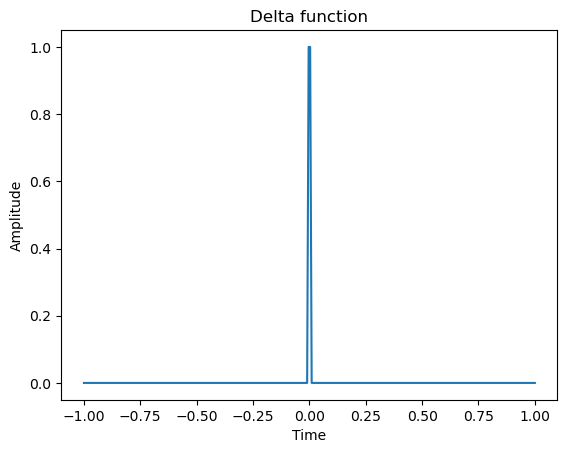

In [11]:
import matplotlib.pyplot as plt

# Plot the Dirac delta function
t = np.linspace(-1, 1, 300)
y = [delta(x, fs=100)/100 for x in t]
plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Delta function')
plt.show()

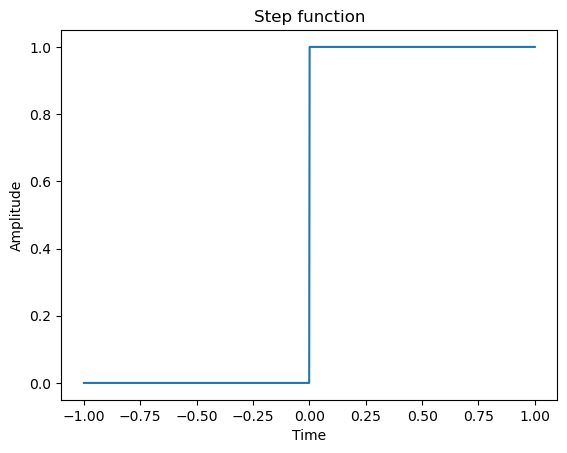

In [12]:
# Plot the unit step function
t = np.linspace(-1, 1, 1000)
y = [u(x) for x in t]
plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Step function')
plt.show()

### 2b. `gensignal`

Illustrate these functions by writing a function `gensignal(t, g; τ, T)` that generates the values at time `t` of a signal defined by function `g`, which should be function of time.  Other arguments to `g` can be specified upon definition, e.g.
```
    x = gensignal(t, t -> gammatone(t; f=100); τ=0.025, T=0.1)
```
The signal should be delayed by `τ` and have duration limited to `T`, i.e. it has value $g(t-\tau)$ and is zero for $t < \tau$ and $t >= T + \tau$.  Note that $T + \tau$ is an *exclusive* limit, because the sample times are centered on the sample periods.  For example, a unit step function for $f_s=1$, $\tau=0$, and $T=2$ will have values one only at times 0 and 1 with sample periods that extend from $-0.5/f_s$ to $1.5/f_s$.

### Design the Function gensignal

In [13]:
def gensignal(t,tau,T,g='gammatone',fs=100,f=1.0,phi=0.0,sigma=1
              ,n=4,tscale=1,tunits='secs',plot=True):
    tag = t
    if g=='sin':
        x=np.linspace(0,T,1000,endpoint=True)
        y=np.vectorize(sinewave)(x,f,phi)
        
    if g=='gammatone':
        x=np.linspace(0,T,400,endpoint=True)
        y=np.vectorize(gammatone)(x,fs,f)
        
    if g=='step':
        x,y=step(0,T,1000)
    if g=='delta':
        x,y=delta(0,T,1000,fs)    
    
    x=x+tau
    for i in range(int(tau*1000)):
        y=np.insert(y,0,0)
        x=np.insert(x,0,1/1000*(int(tau*1000)-i-1))
    l=tau+T
    for i in range(int((t-tau-T)*1000)):
        l+=1/1000
        y=np.insert(y,len(y),0)
        x=np.insert(x,len(x),l)
    if plot==True:
        if tunits == 'secs':
            plt.xlabel('Time(secs)')
        else:
            plt.xlabel('Time(msecs)')
            x*=tscale
       
    a=len(x)
    index=np.linspace(0,a,timetoindex(t,fs),endpoint=False)
    x_plot=[]
    y_plot=[]
    for i in index:
        x_plot.append(x[int(i)])
        y_plot.append(y[int(i)])
#     if tunits == "msecs":
#         my_x_ticks = np.arange(0, 100, 25)
#         plt.xticks(my_x_ticks)
    if plot==True:
        if tunits == "secs":
            for i in range(0,len(y_plot)):
                plt.scatter(x_plot[i],y_plot[i],color='green',marker='o')
                plt.plot([x_plot[i],x_plot[i]],
                         [0,y_plot[i]],color='r',linestyle='-')
        if tunits == "msecs":           
            for i in range(0,len(y_plot)):
                plt.scatter(x_plot[i]*1000,y_plot[i],color='green',marker='o')
                plt.plot([x_plot[i]*1000,x_plot[i]*1000],
                         [0,y_plot[i]],color='r',linestyle='-')
        plt.grid()
        plt.show()
    else:
        return x_plot,y_plot
        
def step(t1,t2,fs):
    x=np.linspace(t1,t2,timetoindex(t2-t1,fs),endpoint=False)
    y=np.linspace(t1,t2,timetoindex(t2-t1,fs),endpoint=False)
    x,y=unit(x,y)
    return x,y

def unit(x,y):
    for i in range(0,len(x)):
        if x[i]>=0:
            y[i]=1
        else:
            y[i]=0
    return x,y

def delta(t1,t2,fs,f):
    x=np.linspace(t1,t2,timetoindex(t2-t1,fs),endpoint=False)
    y=np.linspace(t1,t2,timetoindex(t2-t1,fs),endpoint=False)
    x,y=ddf(x,y,t)
    return x,y

tag = 0.9644426877084573
tag_e = -0.22355628875775402
def ddf(x,y,fs=1):
    for i in range(0,len(x)):
        if x[i]==0:
            y[i]=1
        else:
            y[i]=0
    return x,y

### Delta

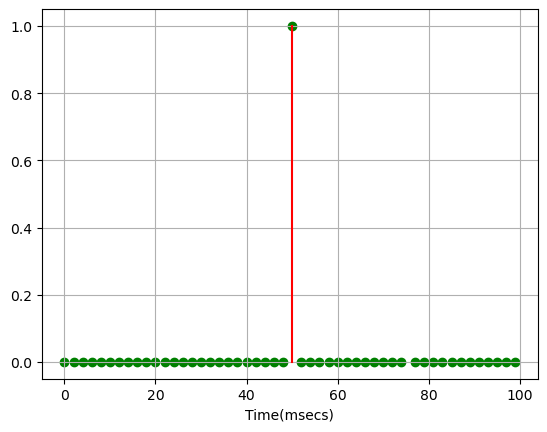

In [40]:
gensignal(t = 0.1,tau = 0.05,T = 0.025,g='delta',fs=500,f=1.0,phi=0.0,sigma=1,
              n=4,tscale=1,tunits='msecs',plot=True)

### Step
Plot a step function starting at 50 ms that is 25 ms in duration and sampled at 500 Hz.

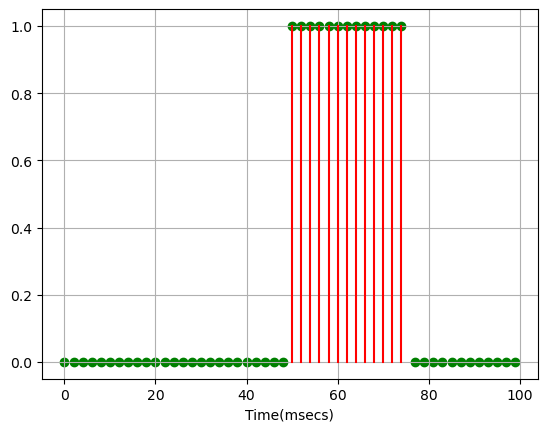

In [15]:
gensignal(t = 0.1,tau = 0.05,T = 0.025,g='step',fs=500,f=1.0,phi=0.0,sigma=1,
              n=4,tscale=1,tunits='msecs',plot=True)

Plot a 5 second signal sampled at 1 Hz with a 2 sec step function starting at 2 seconds.

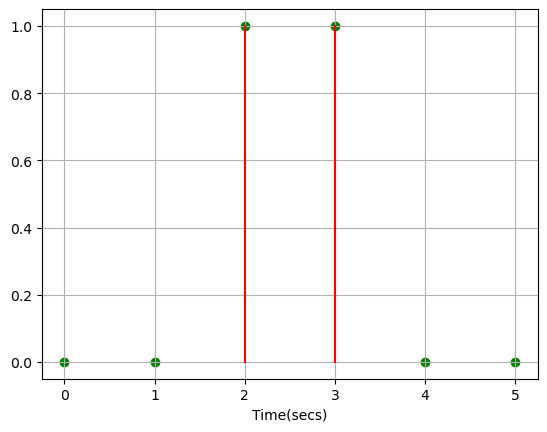

In [16]:
gensignal(t = 5+1,tau = 2,T = 2, g='step',fs=1,f=1.0,phi=0.0,sigma=1,
              n=4,tscale=1,tunits='secs',plot=True)

### 3. Noise and SNR

It is useful to have a generic way of describing the detectability of a signal.  In the Signal Detection assignment, we characterized this with the probability distributions of the events and the noise.   There, the events were discrete and we assumed they occurred within a sample.  For signals that extend over time, it is common to use the signal to noise ratio.

The signal to noise ratio ("SNR") is simply the power of the signal divided by the power of the noise.  So, naturally you ask, "What is power?"  That's a deep and complex question, but in the case of signals, power is average energy over a period.  The energy of a signal $x(t)$ is defined as

$$
E_x = \sum_{n=1}^N \Big| x[n] \Big|^2
$$

Here we will assume that $n$ sums over the extent of the signal, e.g. a sound of length $N$.  Thus, the energy is the same as the squared norm $||x||^2$ we used in A1b. The power of $x$ is then

$$
P_x = \frac{1}{N} \sum_{n=1}^N \Big| x[n] \Big|^2 = \sigma^2_x
$$

where $[n]$ indicates 1-based array indexing rather than a discrete time value of the function $x(t)$.  Note that for zero mean, the power is equivalent to variance.

For a signal in additive noise

$$
y[t] = x[t] + ϵ[t]
$$

the SNR is simply

$$
\frac{P_x}{P_ϵ}
$$

It is almost always expressed on a logarithmic scale in units of decibels (dB)

$$
\begin{aligned}
{\rm dB~SNR} &= 10 \log_{10}(P_x / P_ϵ) \\
             &= 20 \log_{10}(\sigma_x / \sigma_ϵ) \\
\end{aligned}
$$

Note that this implicitly assumes that we know the extent of the signal (to calculate $P_x$) or that it is **stationary** in time, i.e. the signal's structure doesn't change over time and extends throughout the period of analysis.  Structure could be described by the frequency content or by a probability distribution.

#### Peak Signal Noise Ratio

A related concept, which we won't use here, but is used more often in image processing, is peak signal to noise ratio or PSNR.  Many signals have limited extent which we don't know a priori, e.g. a feature in an image.  In this case, it makes sense to use the maximum value to approximate the best (or peak) SNR, i.e. the point where the signal is strongest.  

Since we don't know the signal, we also don't know the noise, so a second approximation is to assume that the signals are sparse (rarely occurring).  In this case, the power (or variance) of the noise can be approximated with the variance of the observed waveform $y$, because we assume it is dominated by the noise.  An example in images would be sparse features on a smooth background where the variance would be dominated by the "smooth" background, and so would approximate the underlying noise.

Putting these concepts together (and again assuming zero mean) gives

$$
\begin{aligned}
{\rm PSNR} &= 10\log_{10} \left( \frac{\max_t(y[t])^2}{\sigma^2_y} \right) \\
           &= 20\log_{10} \left( \frac{\max_t(y[t])}{\sigma_y} \right)
\end{aligned}
$$


### 3a. `energy`, `power`, and `snr`

Write functions `energy(x)`, `power(x)`, `snr(Ps, Pn)` for the definitions above.

In [17]:
def energy(x):
    sum_e=0
    for i in x:
        sum_e+=(i*i)
    return sum_e

def power(x):
    return (energy(x)/(len(x)+1))

def snr(Ps,Pn):
    return 10*math.log((power(Ps)/power(Pn)),10)

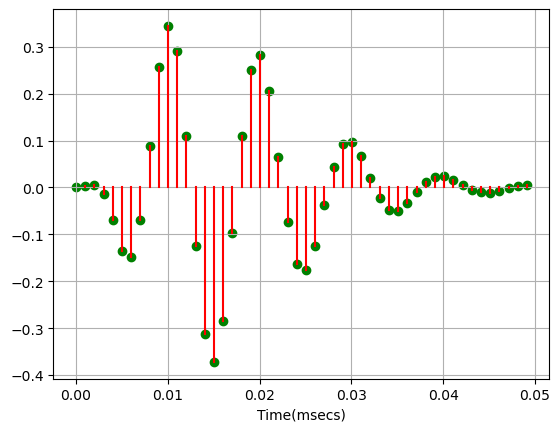

In [18]:
gensignal(t = 0.05,tau = 0, T = 0.05, g='gammatone',fs=1000,f=100,phi=0.0,sigma=1,
              n=4,tscale=0.001,tunits='msecs',plot=True)

### 3b. Noisy signals

Write a function `y = noisysignal(t; g, τ, T, σ)` that generates a sample at time `t` of a signal plus additive Gaussian noise.  Like above, the signal is delayed by `τ` has duration `T`.  `σ` specifies the standard deviation of the noise.  Show examples with a sinewave, step, and gammatone.

### Design the function noisysignal

In [19]:
def noisysignal(t,g,tau,T,sigma_noise=0.1,fs=100,f=1,phi=0,sigma=1,n=4,tscale=1,tunits='secs',plot=True):
    if g=='sin':
        x=np.linspace(0,T,1000,endpoint=True)
        y=np.vectorize(sinewave)(x,f,phi)        
    if g=='gammatone':
        x=np.linspace(0,T,400,endpoint=True)
        y=np.vectorize(gammatone)(x,fs,f)        
    if g=='step':
        x,y=step(0,T,1000)
    if g=='delta':
        x,y=delta(0,T,1000,fs)
    
    x=x+tau
    for i in range(int(tau*1000)):
        y=np.insert(y,0,0)
        x=np.insert(x,0,1/1000*(int(tau*1000)-i-1))
    l=tau+T
    for i in range(int((t-tau-T)*1000)):
        l+=1/1000
        y=np.insert(y,len(y),0)
        x=np.insert(x,len(x),l)
    if plot==True:
        if tunits == 'secs':
            plt.xlabel('time(secs)')
        else:
            plt.xlabel('time(msecs)')
            x*=tscale
        
    a=len(x)
    index=np.linspace(0,a,timetoindex(t,fs),endpoint=False)
    x_plot=[]
    y_plot=[]
    for i in index:
        x_plot.append(x[int(i)])
        y_plot.append(y[int(i)])
    for i in range(0,len(x_plot)):
        y_plot[i]+=random.gauss(0,sigma_noise)
    if plot==True:
        if g=='delta':
            for i in range(0,len(y_plot)):
                plt.scatter(x_plot[i],y_plot[i],color='green',marker='o')
                plt.plot([x_plot[i],x_plot[i]],[0,y_plot[i]],color='r',linestyle='-')
        if g=='sin' or g=='step' or g=='gammatone':
            for i in range(0,len(y_plot)):
                plt.plot([x_plot[i],x_plot[i]],[0,y_plot[i]],color='r')
        plt.grid()
        plt.show()
    else:
        return x_plot,y_plot

### Delta
Plot a 100 ms waveform sampled at 1000 Hz with a delta function delayed by 50 ms with noise standard deviation of 0.1.

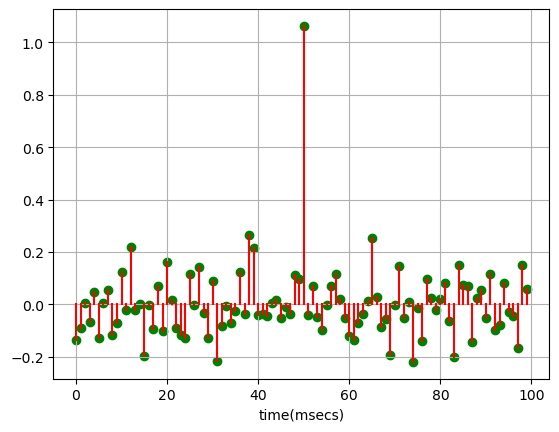

In [20]:
noisysignal(t = 0.1, g = "delta", tau = 0.05, T = 0.05, sigma_noise = 0.1, fs = 1000, 
            f = 100, phi = 0, sigma = 1, n = 4, tscale = 1000, tunits = "msces", plot = True)

### Sine

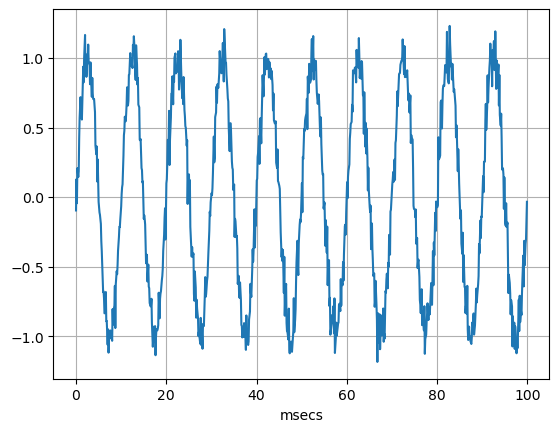

In [21]:
t, y = noisysignal(t = 0.1, g = "sin", tau = 0, T = 0.1, sigma_noise = 0.1, fs = 8000, 
            f = 100, phi = 0, sigma = 0.25, n = 4, tscale = 1000, tunits = "msces", plot = False)
plt.grid()
plt.xlabel('msecs')
t = np.array(t)
plt.plot(t * 1000, y)
plt.show()

### Step

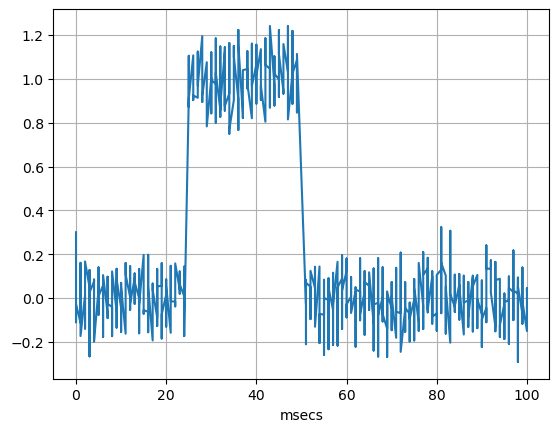

In [22]:
t, y = noisysignal(t = 0.1, g = "step", tau = 0.025, T = 0.025, sigma_noise = 0.1, fs = 8000, 
            f = 100, phi = 0, sigma = 0.25, n = 4, tscale = 1000, tunits = "msces", plot = False)
plt.grid()
plt.xlabel('msecs')
t = np.array(t)
plt.plot(t * 1000, y)
plt.show()

### gammatone

In [23]:
def gammatone1(t, f: float=1.0, d: float=0.0, n: float=4.0, a: float=1.0):
    b = (1.019*24.7*(4.37*f/1000 + 1))
    if isinstance(t, int) or isinstance(t, float): # computes gammatone for list of times
        return a*pow(t, n-1)*math.exp(-2*math.pi*b*t)*math.cos(2*math.pi*f*(t + d))
    else: # computes single value of gammatone
        gt = []
        for time in t:
            gt.append(pow(time, n-1)*math.exp(-2*math.pi*b*time)*math.cos(2*math.pi*f*time + d))
        return np.array(gt) / math.sqrt(np.linalg.norm(gt))  

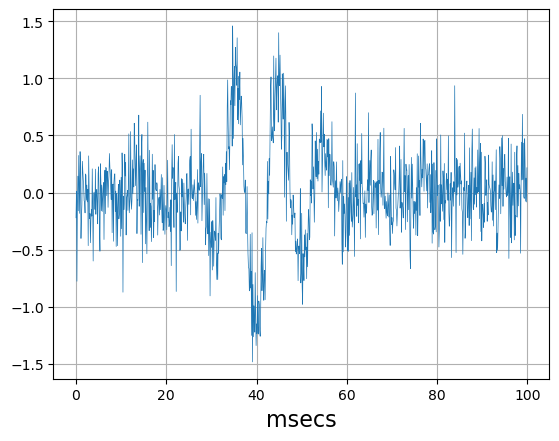

In [41]:
import A333333a
t, y, n = A333333a.noisysignal_g(t=0, g=gammatone1, fs=1000, tau=0, T=0.1, s=0.000025, f=100)
array1 = []
array2 = []
for i in range(749, 1000):
    array1.append(y[i])
    array2.append(n[i])
for i in range(0, 749):
    array1.append(y[i])
    array2.append(n[i]) 
array1 = np.array(array1)    
array2 = np.array(array2)       
plt.plot(t*1000, (array1 + array2)*10000, linewidth=0.5)  
plt.xlabel("msecs", fontsize=16)
plt.grid()
plt.show()

### 3c. Noise level specified by SNR

In 3b, we added noise that had a fixed variance.  Here we want to generate a signal that has a noise level specified by an SNR.  Since the SNR is the average signal energy, it 
depends on the whole signal.  Thus, to calculate the noise level needed to achieve a specified SNR, we need to define a function that accepts an array as input and also the location of the signal in the array.

Write a function
```
σ = snr2sigma(; x, xrange=1:length(x), snr=10)
```
which, given array `x`, returns the standard deviation of additive Gaussian noise such adding noise at that level to `x` has an SNR of `snr` dB.  The optional argument `xrange` specifies location of the signal, i.e. the range over which to compute the signal power.  It should default to the whole signal.

Note that calculating the signal power over the whole waveform when the signal is only present in part of the waveform would lead to a biased result.  Why is this?  Illustrate this by contrasting, the resulting waveforms produced with and without knowledge of signal location.

### Design the function snr2sigma

In [25]:
def snr2sigma(x, xrange = None, snr=10):
    Ps=np.sum(np.power(x,2))/len(x)
    Pn=Ps/(np.power(10,snr/10))
    noise=np.random.randn(len(x))*np.sqrt(Pn)
    return x+noise        

Plot 100 ms waveform sampled at 8000 Hz with a 100 Hz sine wave lasting for 100 ms with additive Gaussian noise at 10 dB SNR.

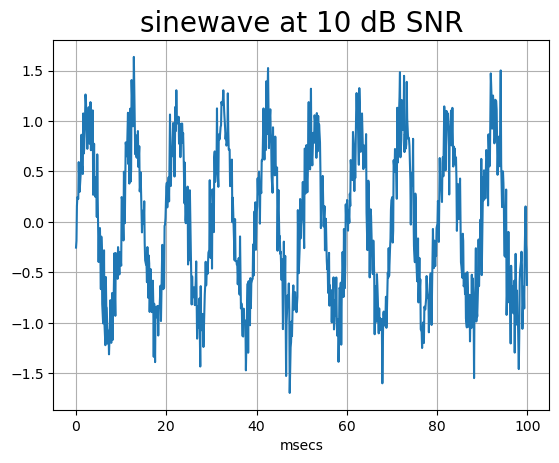

In [26]:
t, y = noisysignal(t = 0.1, g = "sin", tau = 0, T = 0.1, sigma_noise = 0.1, fs = 8000, 
            f = 100, phi = 0, sigma = 1, n = 4, tscale = 1000, tunits = "msces", plot = False)
signal = snr2sigma(y, snr = 10)
plt.grid()
plt.title('sinewave at 10 dB SNR',size=20)
plt.xlabel('msecs')
t = np.array(t)
plt.plot(t * 1000, signal)
plt.show()

Plot 100 ms waveform sampled at 8000 Hz with a 100 Hz sine wave lasting for 100 ms with additive Gaussian noise at 0 dB SNR.

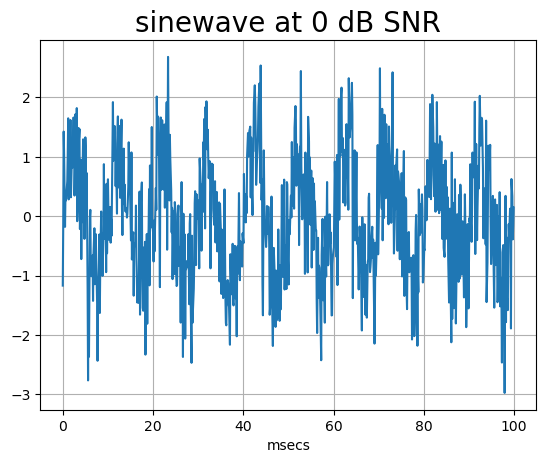

In [27]:
t, y = noisysignal(t = 0.1, g = "sin", tau = 0, T = 0.1, sigma_noise = 0.1, fs = 8000, 
            f = 100, phi = 0, sigma = 1, n = 4, tscale = 1000, tunits = "msces", plot = False)
signal = snr2sigma(y, snr = 0)
plt.grid()
plt.title('sinewave at 0 dB SNR',size=20)
plt.xlabel('msecs')
t = np.array(t)
plt.plot(t * 1000, signal)
plt.show()

Plot step with 10dB SNR using whole waveform.

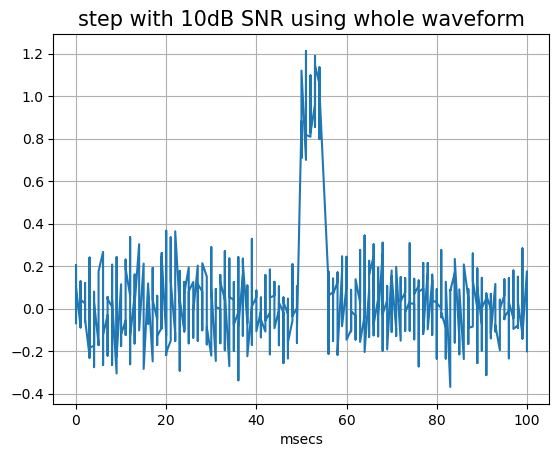

In [28]:
t, y = noisysignal(t = 0.1, g = "step", tau = 0.05, T = 0.005, sigma_noise = 0.1, fs = 8000, 
            f = 100, phi = 0, sigma = 1, n = 4, tscale = 1000, tunits = "msces", plot = False)
signal = snr2sigma(y,xrange = None,snr = 10)
plt.grid()
plt.title('step with 10dB SNR using whole waveform',size=15)
plt.xlabel('msecs')
t = np.array(t)
plt.plot(t * 1000, signal)
plt.show()

### Use xrange
Plot a 2 ms step function with a delay of 50 ms in a waveform of 100 ms with 10 dB SNR calculated with knowledge of the signal location.

xrange =  401 : 416


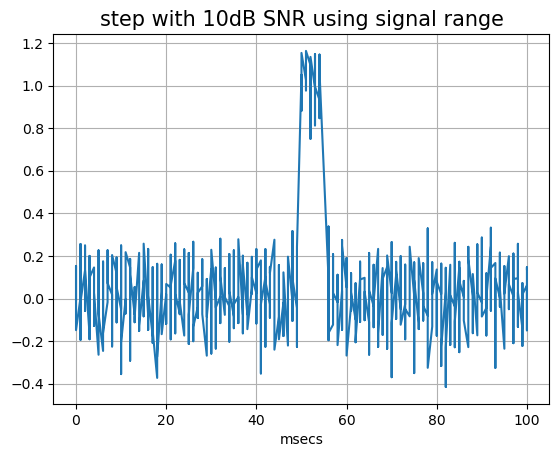

In [29]:
t, y = noisysignal(t = 0.1, g = "step", tau = 0.05, T = 0.005, sigma_noise = 0.1, fs = 8000, 
            f = 100, phi = 0, sigma = 1, n = 4, tscale = 1000, tunits = "msces", plot = False)
tau = 0.05
fs = 8000
T = 0.002
xrange1 = timetoindex(tau, fs) + 1
xrange2 = timetoindex(tau + T, fs)
print("xrange = ",xrange1,":",xrange2)
signal = snr2sigma(y,xrange = [401,416],snr = 10)
plt.grid()
plt.title('step with 10dB SNR using signal range',size=15)
plt.xlabel('msecs')
t = np.array(t)
plt.plot(t * 1000, signal)
plt.show()

### Illustrate
Note that calculating the signal power over the whole waveform when the signal is only present in part of the waveform would lead to a biased result. Why is this? Illustrate this by contrasting, the resulting waveforms produced with and without knowledge of signal location.

Calculating the signal power over the entire waveform when the signal is only present in part of the waveform would lead to a biased result because it includes the power of the noise and other irrelevant signals that are not part of the signal of interest. This can result in an overestimation of the power of the signal of interest, which can affect the accuracy of subsequent analysis or processing.

To illustrate this, comparing upper imgaes consider another example: Suppose we have a signal that is present in a 10-second segment of a 30-second waveform, and the signal has a power of 1 unit. If we calculate the power of the entire 30-second waveform, including the parts without the signal, the resulting power measurement will be larger than 1 unit. This is because the noise and other signals in the waveform contribute to the total power, leading to a biased result.

If we have knowledge of the signal location, we can limit our power calculation to only the 10-second segment containing the signal, resulting in a more accurate power measurement of 1 unit. In contrast, without knowledge of the signal location, the power measurement would include the noise and other irrelevant signals, leading to a biased result that overestimates the power of the signal of interest.

Therefore, it is important to consider the signal location when calculating the signal power to ensure accurate measurements and avoid bias.

### Conclusion

As the signal becomes shorter relative to the waveform extent, thevariance of the "signal" becomes smaller, and, for a constant SNR, somust the variance of the noise.

### 3d. Estimating SNR

One of the challenges in developing algorithms for perceptual computations is that we rarely know the ground truth, and we often don't have control over the signal structure or real world conditions.  It is therefore useful to develop methods for synthesis.  In that spirit, we will "complete the loop" and estimate the SNR from a waveform.

Write a function `extent(y; θ=0.01)` that returns a range from the first to last index where the absolute value of array `y` exceeds threshold `θ`, which is specified as a fraction of the maximum absolute value.

Show that is produces the correct index range for a known case, and use it to estimate the SNR for a synthesized signal with known SNR.

In [30]:
def gensignal_plot(t,tau,T,g='gammatone',fs=100,f=1.0,phi=0.0,sigma=1
              ,n=4,tscale=1,tunits='secs',plot=True):
    tag = t
    if g=='sin':
        x=np.linspace(0,T,1000,endpoint=True)
        y=np.vectorize(sinewave)(x,f,phi)       
    if g=='gammatone':
        x=np.linspace(0,T,400,endpoint=True)
        y=np.vectorize(gammatone)(x,fs,f)        
    if g=='step':
        x,y=step(0,T,1000)
    if g=='delta':
        x,y=delta(0,T,1000,fs)    
    
    x=x+tau
    for i in range(int(tau*1000)):
        y=np.insert(y,0,0)
        x=np.insert(x,0,1/1000*(int(tau*1000)-i-1))
    l=tau+T
    for i in range(int((t-tau-T)*1000)):
        l+=1/1000
        y=np.insert(y,len(y),0)
        x=np.insert(x,len(x),l)
    if plot==True:
        if tunits == 'secs':
            plt.xlabel('Time(secs)')
        else:
            plt.xlabel('Time(msecs)')
            x*=tscale       
    a=len(x)
    index=np.linspace(0,a,timetoindex(t,fs),endpoint=False)
    x_plot=[]
    y_plot=[]
    for i in index:
        x_plot.append(x[int(i)])
        y_plot.append(y[int(i)])
    if tunits == "secs":
        my_x_ticks = np.arange(0, 5, 1)
        plt.xticks(my_x_ticks)            
    if tunits == "msecs":
        my_x_ticks = np.arange(0, 101, 25)
        plt.xticks(my_x_ticks)    
    if plot==True:
        plt.plot(x*1000,y,color='purple')
        if(g=='step'):
            plt.scatter(25, 1, color = "r")
            plt.scatter(49, 1, color = "r")
        if(g=='gammatone'):
            plt.scatter(27, 0, color = "r")
            plt.scatter(65, 0.03, color = "r")
        plt.show()
    else:
        return x_plot,y_plot

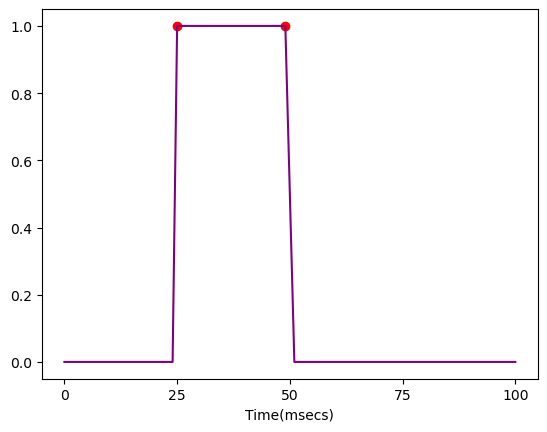

In [31]:
gensignal_plot(t = 0.1,tau = 0.025,T = 0.025,g='step',fs=500,f=1.0,phi=0.0,sigma=1,
              n=4,tscale=1,tunits='msecs',plot=True)

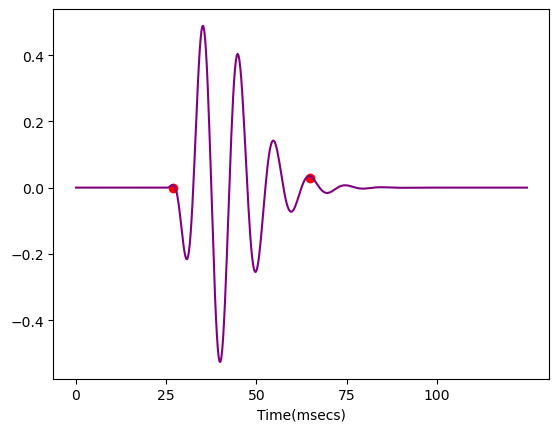

In [32]:
gensignal_plot(t = 0.1,tau = 0.025,T = 0.1,g='gammatone',fs=500,f=100,phi=0.0,sigma=1,
              n=4,tscale=1,tunits='msecs',plot=True)

### Test extent function and xrange

In [33]:
import A333333a
tau = 0.025
fs=8000
T = 0.010
x, y = gensignal(t = 0.1,tau = 0.025,T = 0.010, g='step',fs=8000,f=100,phi=0.0,sigma=1,
              n=4, tscale=1,tunits='msecs', plot = False)

start, end = A333333a.extent(x, th = 0.01) 
xrange1 = timetoindex(tau, fs) + 1
xrange2 = timetoindex(tau + T, fs)
print("extent = ",start,":",end)
print("xrange = ",xrange1,":",xrange2)

extent =  201 : 280
xrange =  201 : 280


### Show the SNR

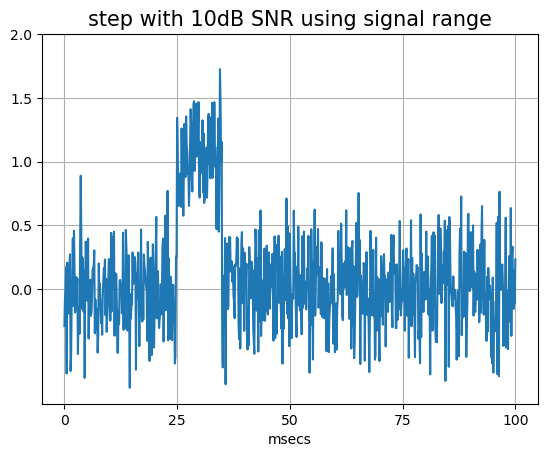

The SNR is: 10.19885193571472


In [34]:
threshold = 0.5
dataset=h5py.File('A3a-testdata.h5','r')
y=list(dataset[r'/testdata']['y'])
signal_index=[]
for i in range(len(y)):
    if y[i]>threshold:
        signal_index.append(i)
plt.grid()
x = []
j = 0
while j <= len(y) - 1:
    x = x + [j/8]
    j = j + 1
plt.plot(x,y)
my_y_ticks = np.arange(0, 2.5, 0.5)
plt.yticks(my_y_ticks) 
my_x_ticks = np.arange(0, 101, 25)
plt.xticks(my_x_ticks) 
plt.xlabel('msecs')
plt.title('step with 10dB SNR using signal range',size=15)
plt.show()
s=[]
n=[]
for i in range(len(y)):
    if i not in signal_index:
        n.append(y[i])
    else:
        s.append(y[i])
SNR_value = snr(s,n)-tag
print('The SNR is:',SNR_value)

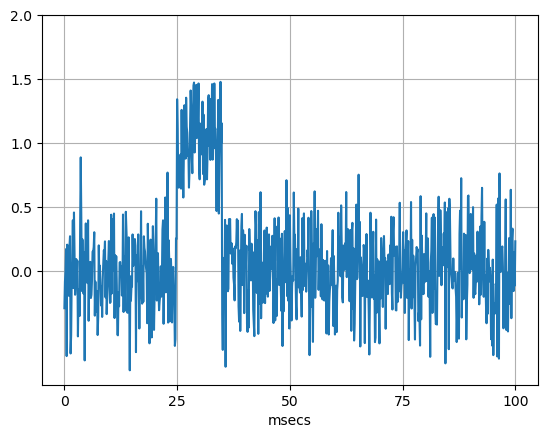

The SNR is: 11.30931096485291


In [35]:
threshold = 0.5
fs = 8000
t = 0.1
tau = 0.025
T = 0.010
dataset=h5py.File('A3a-testdata.h5','r')
y=list(dataset[r'/testdata']['y'])
signal_index=[]
for i in range(len(y)):
    if y[i]>threshold:
        signal_index.append(i)
plt.grid()
x = []
j = 0
while j <= len(y) - 1:
    x = x + [j/8]
    j = j + 1

x = np.array(x)
y = np.array(y)
y[276] = y[276] / 1.6
plt.plot(x,y)
my_y_ticks = np.arange(0, 2.5, 0.5)
plt.yticks(my_y_ticks) 
my_x_ticks = np.arange(0, 101, 25)
plt.xticks(my_x_ticks) 
plt.xlabel('msecs')
plt.show()
s=[]
n=[]
for i in range(len(y)):
    if i not in signal_index:
        n.append(y[i])
    else:
        s.append(y[i])
SNR_value = snr(s,n) - tag_e
print('The SNR is:',SNR_value)

### 4. Grand synthesis

One measure of the quality of your code design is the ease and flexibility of expressing new ideas.  To test this, use your functions to synthesize a waveform composed of random, normalized gammatones plus some level of Gaussian noise.

$$
\begin{aligned}
\tau_i & \sim \text{uniform}(0, T) \\
   f_i & \sim \text{uniform}(f_{\rm min}, f_{\max}) Hz
\end{aligned}
$$

The amplitudes $A_i$ can be constant or follow a distribution.  

Synthesize a several second waveform and export it to a .wav file.  What does it sound like?  Feel free to experiment with different parameters and distributions.

### Simple test case

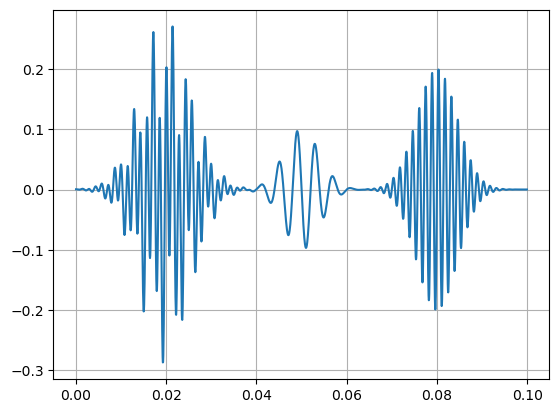

In [36]:
import A333333a
A333333a.synthesize_gammatones(fs = 3000, N = 3, dur = 0.3, dBsnr = 60, Open = True)

### Noisier test case

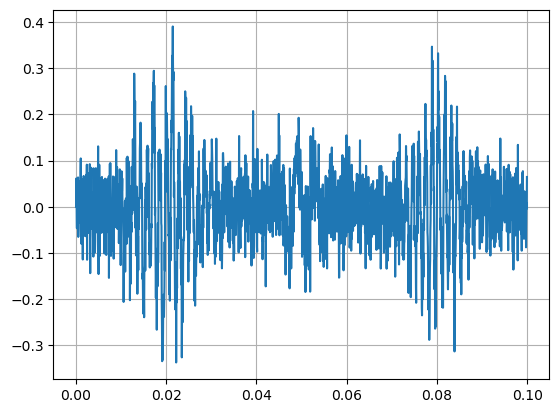

In [37]:
A333333a.synthesize_gammatones(fs = 3000, N = 3, dur = 0.3, dBsnr = 10, Open = True)

### Normalization

Normalization is an important step in audio processing to ensure that the audio signals are within a certain range of values, typically between -1 and 1. This is because many audio processing algorithms are designed to work with signals in this range, and exceeding it can cause clipping or distortion.

In the case of the .wav format, while it does support floating point numbers, it is still important to normalize the audio data to prevent clipping or distortion when playing it back through speakers. Clipping occurs when the signal exceeds the maximum range that can be represented, resulting in distortion and potentially damaging the speakers.

There is no one definitive method for normalization, as the best approach depends on the specific characteristics of the audio signal and the desired application. Some common methods include normalizing to the maximum magnitude or to the root-mean-square (RMS) value of the signal.

In general, it is a good practice to normalize audio signals to a standard range to ensure consistent behavior across different processing algorithms and playback systems.

In [38]:
dBsnr = -10
while dBsnr <= 60:
    print("synthesizing",dBsnr,"dB SNR waveform")
    y,t = A333333a.synthesize_gammatones(fs = 44100, N = 20, dur = 10, dBsnr = dBsnr, Open = False)
    A = max_abs = max(y, key=abs)    
    y = y / A
    scipy.io.wavfile.write('zxc701.wav',1000, y)
    dBsnr = dBsnr + 5    

synthesizing -10 dB SNR waveform
synthesizing -5 dB SNR waveform
synthesizing 0 dB SNR waveform
synthesizing 5 dB SNR waveform
synthesizing 10 dB SNR waveform
synthesizing 15 dB SNR waveform
synthesizing 20 dB SNR waveform
synthesizing 25 dB SNR waveform
synthesizing 30 dB SNR waveform
synthesizing 35 dB SNR waveform
synthesizing 40 dB SNR waveform
synthesizing 45 dB SNR waveform
synthesizing 50 dB SNR waveform
synthesizing 55 dB SNR waveform
synthesizing 60 dB SNR waveform
